# Python version and packages installed

In [3]:
# Packages needed:
# numpy
# matplotlib
# mahotas: https://mahotas.readthedocs.io/en/latest/install.html

# which version of Python is installed?
import sys
print("Python version: {}".format(sys.version))

Python version: 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]


# Import packages into environment

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import mahotas as mh
import pylab
from pylab import imshow, gray, show
%matplotlib inline

# Import image

uint8


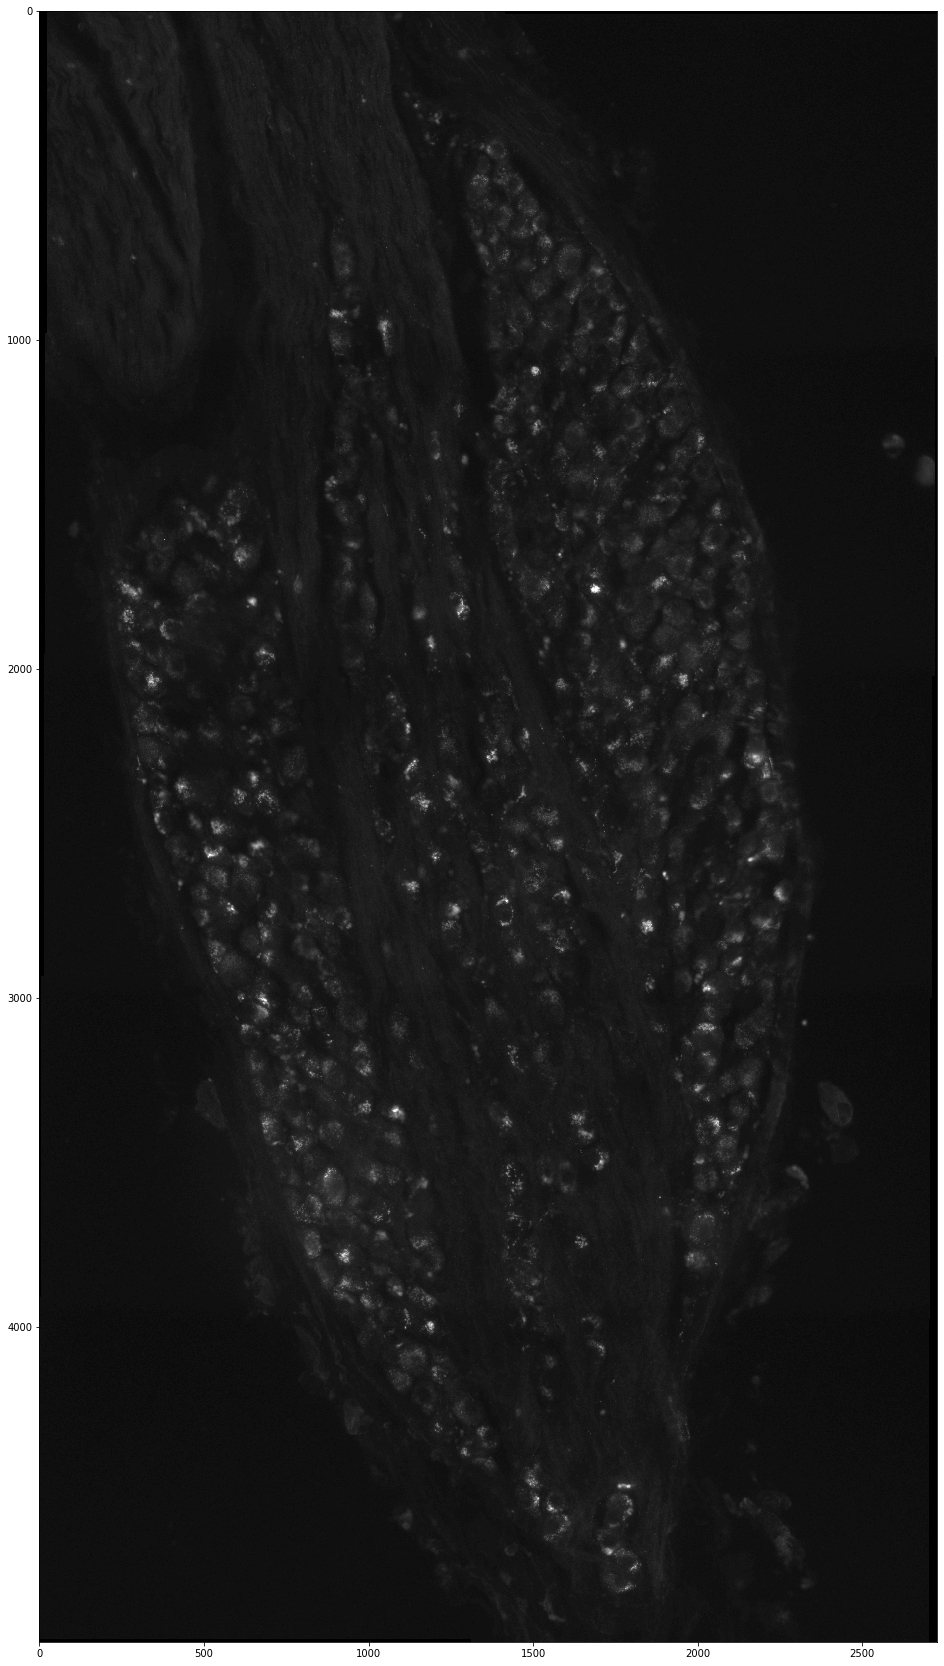

In [7]:
plt.figure(figsize=(60,30))

IM = mh.imread('TestNodose.png')  # Loads in image
print(IM.dtype)                    # prints image type
pylab.imshow(IM)                  # shows image
pylab.gray()                      # makes it greyscale
pylab.show()

# Run filter and thresholding then count cells

Found 105 cells.


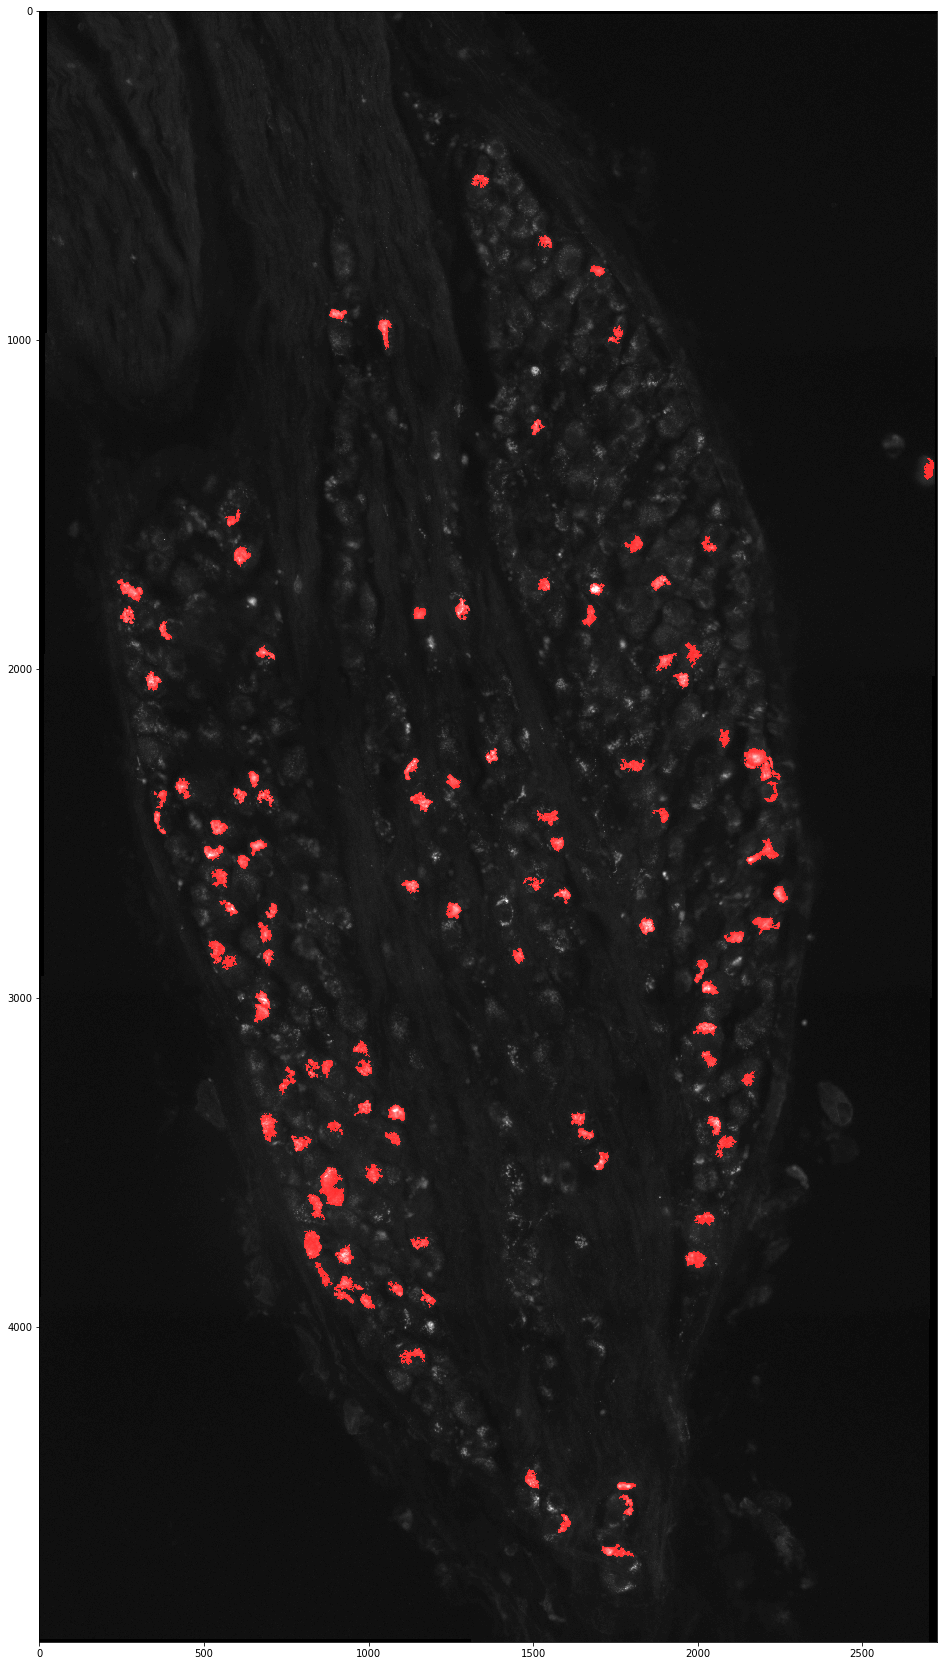

In [8]:
plt.figure(figsize=(60,30))

IMf = mh.gaussian_filter(IM, 0.5)          # applies gaussian filter
IMf = (IMf).astype('uint8')                # converts the image back to uint8 (Important)

T = mh.otsu(IMf)                           # applies otsu thresholding

Test = (IMf > T + 10)                      # shows the original image values that are greater than the threshold

labeled, n_nucleus = mh.label(Test)        # sets up the image for counting
sizes = mh.labeled.labeled_size(labeled)   # creates sizes based on the label p
too_small = np.where(sizes < 1000)         # min pixel parameter for cell size
too_large = np.where(sizes > 50000)        # max pixel paramater for cell size
labeled = mh.labeled.remove_regions(labeled, too_small) # removes regions smaller than the min
labeled = mh.labeled.remove_regions(labeled, too_large) # removes regions larger than the max

labeled, nr_nuclei = mh.label(labeled)     # finds the new cells based on the min/max parameters

print('Found {} cells.'.format(nr_nuclei)) # prints the cell count
pylab.imshow(mh.overlay(IM, labeled))      #shows the original image with a cell overlay
pylab.show()